<a href="https://colab.research.google.com/github/MensureSahin/Hello-World/blob/master/LoanDefaultPredictionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

**The Context:**

Banks always try to manage their risks effectively to ensure financial stability and profitability. Credit risk management is very important for retail banks, especially with regard to the mortgage loan portfolio. Bad loans or non-performing assets (NPAs) can significantly affect a bank's profitability and stability, so they need to be careful when approving loans to their customers.

Traditionally, the loan approval process involves a manual review of various aspects of the loan application, including the borrower's creditworthiness. Not only is this process labor intensive, but it is also prone to errors and biases that can lead to incorrect assessments and approvals.

Using machine learning in credit risk management has the potential to increase the efficiency and accuracy of the credit approval process while minimizing credit risk. However, it is imperative that these models are implemented in a responsible and ethical manner with a focus on fairness and transparency.

**The Objective:**

The purpose of this project is to identify the main factors contributing to credit default and develop a robust classification model to estimate the probability of default risk. To achieve this aim, the HMEQ dataset, which contains information about borrowers' characteristics, credit history and credit performance, will be analyzed.

**The Key Questions:**

The most important factors effecting the risk of default can be grouped by as;

**Borrower's Credit Score** (credit history, outstanding debt, and payment behavior)

**Borrower's Income** (Debt-to-Income Ratio)

**Appraisal of the Property** (assesing its value and the potential for resale, to determine whether it is a good investment)

**Borrower Characteristics** (Job, Education, Age, etc.)

**Economic Indicators** (the economy, local real estate market, interest rates, etc. )

Considering all these factors; we will try to determine the strength and direction of the relationships between these inputs, identifying which characteristics have the greatest impact on loan repayment and which are strong predictors of default.

Therefore, some of the **key questions** should be as follows;

How is customer's repayment history on previous loans or credit accounts?

* Is customer's credit score high?

* Does the applicant work? If works, for how many years?(employment history)

* The amount of monthly income?

* What is the purpose of the loan?

* Value of the collateral (if applicable)

Those are important questions for banks to consider when assessing a loan application. Banks need to evaluate the creditworthiness of their customers and determine whether they are likely to repay the loan on time and in full.

## **Problem Formulation:**

This HMEQ dataset analysis aims to identify the factors contributing to loan defaults and develop a classification model to predict the likelihood of default. The problem is significant because loan defaults can have severe financial consequences for both lenders and borrowers. Therefore, it is essential to identify the critical factors that contribute to default and develop effective strategies to mitigate the risk.


# **Data Description:**

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.

**BAD:** 1 = Client defaulted on loan, 0 = loan repaid

**LOAN:** Amount of loan approved.

**MORTDUE:** Amount due on the existing mortgage.

**VALUE:** Current value of the property.

**REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

**JOB:** The type of job that loan applicant has such as manager, self, etc.

**YOJ:** Years at present job.

**DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

**DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

**CLAGE:** Age of the oldest credit line in months.

**NINQ:** Number of recent credit inquiries.

**CLNO:** Number of existing credit lines.

**DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.



# **Import the necessary libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# **Data Overview**

In [ ]:
# Let's read the dataset and get a copy of it to avoid any changes to original data
data_original = pd.read_csv('hmeq.csv')
data= data_original.copy()

In [ ]:
# checking the first 5 records
data. head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# checking the last 5 records
data. tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [ ]:
# Checking the shape of the data
data.shape

(5960, 13)

The Dataset has 5960 rows and 13 columns.

In [ ]:
# Let's see the data types we'll deal with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
# Here is a more detailed overview showing the % of Missing Values.
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null %', 'N-Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null %,N-Unique,Unique Sample
0,BAD,int64,0,0.00,2,"[0, 1]"
1,LOAN,int64,0,0.00,540,"[40900, 12300]"
2,MORTDUE,float64,518,8.69,5053,"[137140.0, 56960.0]"
3,VALUE,float64,112,1.88,5381,"[73000.0, 191990.0]"
4,REASON,object,252,4.23,2,"[HomeImp, DebtCon]"
5,JOB,object,279,4.68,6,"[Other, Sales]"
6,YOJ,float64,515,8.64,99,"[8.0, 13.0]"
7,DEROG,float64,708,11.88,11,"[6.0, 3.0]"
8,DELINQ,float64,580,9.73,14,"[7.0, 13.0]"
9,CLAGE,float64,308,5.17,5314,"[231.59994452, 267.4388553]"


* REASON and JOB columns are of OBJECT type and the rest of the columns are NUMERIC.

* There are **missing values** in the dataset.

* DEBTINC is the feature with most missing data, more than 1/5 of this column is missing. DEROG is the following feature with 12% of missing.

* As a rule of thumb, if the missing values are less than 5%, we can just drop them, but here the situation is different; The DEBINC, DEROG, DELINQ, MORTDUE, YOJ, and NINQ columns all have missing values greater than 5%.

* Fortunately, banks have access to most of this missing information. That is, these features may have been deliberately left unanswered (to be fulfilled later) to speed up the lending process at the time and then forgotten as such. Only **DEBTINC** and **YOJ** can be tricky for this dataset, especially if the client is self-employed (i.e.presenting a false income statement, false working history,etc.) . We will keep an eye on these two features during our analysis.

* We have a huge amount of missing values and to avoid information loss, we will not remove features from the dataset. Our action for this problem will be to replace them with the **mean** or **median** (if we have outliers) for numerical attributes and with the **mode** for categorical attributes.

In [ ]:
# total number of missing values;
data.isna().sum().sum()

5271

In [ ]:
mvp= (data.isna().sum().sum()/data.count().sum())*100

mvp.round(2)

7.3

Now we can see the percentage of the missing values in all HMEQ Dataset which is 7.3%.

In [ ]:
# Let's see if we have any dublicated data
data.duplicated().value_counts()

False    5960
dtype: int64

The dataset does not include duplicated data.

In [ ]:
# Let's see if the label feature is balanced.

data["BAD"].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [ ]:
data["BAD"].value_counts()/len(data)*100

0    80.050336
1    19.949664
Name: BAD, dtype: float64

**Imbalanced Dataset**

The dataset is imbalanced as the majority of the borrowers have not defaulted, and only a small fraction have defaulted. It is important to note that positive classes are often rare in the context of fraud and error models. That makes sense, because if it were common for people to default on their loans, there wouldn't be many banks left in business.

80% of the clients repaid their loans. This number is significantly higher than the number of clients who defaulted on a loan.

**The Dataset is mildly (20:80) imbalanced.**

20% of these loans are defaulted. This is a huge ratio. Lenders will definitely want to decrease it.

Imbalanced datasets can deceive both human beings and the model itself into believing that it generalizes well. To avoid such a scenario, it is important to understand how to correct the datasets’ imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important. With imbalanced data the model will get biased and this will lead to **overfitting**. This is clearly a problem because many machine learning algorithms are designed to maximize overall accuracy.

We have an imbalanced data and there are some techniques to overcome this problem. We will dwell on this subject further on.

What we've seen so far;

*  We have an **imbalanced dataset** with 5950 rows and 13 columns.
*  2 of these 13 features are type of Object and others are Numeric.
*  Data set has **no dublicated values**.
*  We have **missing values**. Since they are a big proportion (7.3%) of the data, we will not drop any of them and apply appropriate imputing methods.

In [ ]:
# Before handling those problems let's first dive in more detailed analyzes for categorical features.
data.describe(exclude='number')

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [ ]:
# Checking the count of unique values in each categorical column
cols_cat= data.select_dtypes(['object'])
for i in cols_cat.columns:
     print(data[i].value_counts(normalize=True)*100)
     print('*'*40)

DebtCon    68.815697
HomeImp    31.184303
Name: REASON, dtype: float64
****************************************
Other      42.034853
ProfExe    22.460834
Office     16.687203
Mgr        13.501144
Self        3.397289
Sales       1.918676
Name: JOB, dtype: float64
****************************************


In [ ]:
# groupby description for categorical values

data.groupby(['BAD']).describe(exclude = 'number')

REASON                         JOB                    
     count unique      top  freq count unique    top  freq
BAD                                                       
0     4567      2  DebtCon  3183  4515      6  Other  1834
1     1141      2  DebtCon   745  1166      6  Other   554

When we check the categorical columns:

* We see that the **REASON** feature has 2 unique values; **DebtCon** and HomeImp. DebtCon is the dominant one; almost 70% of the loan taken is for to pay off other liabilities and consumer debts. And 65% of defaults come from this type of reason (745/1141).

* Nearly 20% (1141/5708) of the column REASON is defaulted on loan, meaning that we need to give importance to this column. It should have an importance on the classification rule. It looks like that loan seekers roll over their loans, they go into debt again to pay their old loans.

* The **JOB** column has 6 different options with **Other** being the dominant one (42%). When we look at the chart above, we can easily see that nearly half of the defaulted client's job prefence is Other. Here also, 20% of this column is 1 and the JOB feature shouldn't be ignored as well.

* The **missing values for these two columns** are below 5% and can be replaced with the most frequent values; DebtCon for REASON and Other for JOB.

* We have two columns with type of 'object'. Let's convert them to 'categorical'. Category is a form of dynamic enumeration. When there are string variables with a few different values, it's better to use categorical type since this will save some memory by reducing the data space required to store the dataframe

In [ ]:
# converting object type column to category
for col in data.columns:
  if data[col].dtypes == object:
   data[col] = data[col].astype('category')

# **Summary Statistics**

In [ ]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


From the descriptive statistics above I can draw the followings:

* We can expect **outliers** for all these features, since the max values are far above even the Q3 values. We will double check this assumption after plotting the distributions.

* Average LOAN amount is 18,608 USD with min 1,100 USD and while maximum loan amount is 89,900 USD.

* Almost 20% of people did not pay their loans. (1 = Client defaulted on loans)

* The current outstanding mortgage balance, MORTDUE, is 73,760 USD.

* The house VALUE, on average, is 101,776 USD with a maximum value of 855,909 USD.

* Derogatory marks (e.g.bankrupcies) occured in 25% of instances.


* At least 50% of the applicants have been working at their current jobs for 7 years, which shows a stable income.

* Debt to income ratio has an average of nearly 34%.

* We expect low amounts of DEROG, DELINQ, NINQ, CLNO and DebtInc for the sake of our risk management. These statistics meet our expectations and show that the credibility of most customers is decent.

* For the CLAGE feature, we want the opposite and expect high values. For this dataset, average age of the oldest credit line is 15 years (180 months), and at least half of these borrowers received their first loan 14 years ago.This ratio is important to capture customer payment performance.

We have seen the basic statistics for all numeric features. Now Let's examine descriptive statistics for PAID Loans and DEFAULT Loans separately.

**Descriptive statistics for PAID loans**

In [ ]:
data[data['BAD']==0].drop('BAD', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,4771.0,19028.107315,11115.758554,1700.000000,11700.000000,16900.000000,23500.000000,89900.000000
MORTDUE,4359.0,74829.249055,43584.993587,2619.000000,47484.000000,66839.000000,93068.000000,371003.000000
VALUE,4764.0,102595.921018,52748.392952,8000.000000,67297.750000,90659.000000,120615.500000,471827.000000
YOJ,4321.0,9.154941,7.676033,0.000000,3.000000,7.000000,13.000000,36.000000
DEROG,4150.0,0.134217,0.514490,0.000000,0.000000,0.000000,0.000000,6.000000
DELINQ,4263.0,0.245133,0.674124,0.000000,0.000000,0.000000,0.000000,5.000000
CLAGE,4541.0,187.002355,84.465217,0.486711,120.219885,180.415787,240.157802,649.747104
NINQ,4336.0,1.032749,1.531322,0.000000,0.000000,1.000000,2.000000,11.000000
CLNO,4602.0,21.317036,9.682601,0.000000,15.000000,20.000000,26.000000,56.000000
DEBTINC,4290.0,33.253129,6.947482,0.720295,28.905127,34.541671,38.739077,45.569843


**Descriptive statistics for DEFAULT loans**

In [ ]:
data[data['BAD']==1].drop('BAD', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,1189.0,16922.119428,11418.455152,1100.000000,9200.000000,14900.000000,21700.000000,77400.000000
MORTDUE,1083.0,69460.452973,47588.194467,2063.000000,39946.500000,60279.000000,85864.500000,399550.000000
VALUE,1084.0,98172.846227,74339.822506,8800.000000,59368.250000,82000.000000,116000.000000,855909.000000
YOJ,1124.0,8.027802,7.100735,0.000000,2.000000,6.000000,12.000000,41.000000
DEROG,1102.0,0.707804,1.468381,0.000000,0.000000,0.000000,1.000000,10.000000
DELINQ,1117.0,1.229185,1.902961,0.000000,0.000000,0.000000,2.000000,15.000000
CLAGE,1111.0,150.190183,84.952286,0.000000,96.033333,132.866667,193.283333,1168.233561
NINQ,1114.0,1.782765,2.246976,0.000000,0.000000,1.000000,3.000000,17.000000
CLNO,1136.0,21.211268,11.812981,0.000000,13.000000,20.000000,28.000000,71.000000
DEBTINC,403.0,39.387645,17.723586,0.524499,32.383046,38.079762,43.285990,203.312149


By comparing these two tables we can say that **high DEBTINC, DEROG, DELINQ, NINQ** and **low CLAGE** could be our FLAGS to anticipate which loans could default.

Although a customer's employment history is an important trait for credibility (a borrower with a stable job and a higher income is considered less likely to default), YOJ doesn't appear to have a large impact on defaults for this dataset.

# **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

BAD
Skew : 1.5


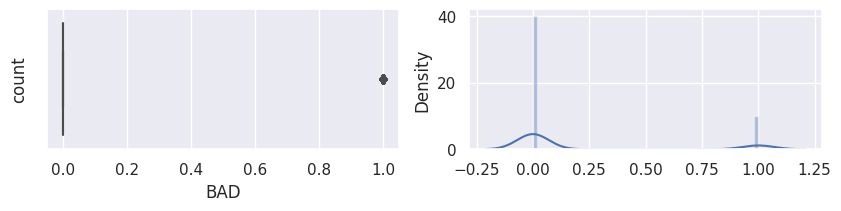

LOAN
Skew : 2.02


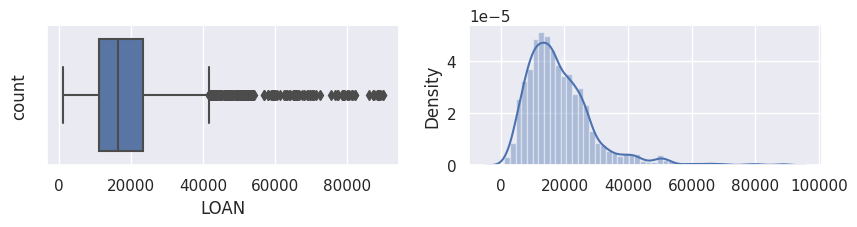

MORTDUE
Skew : 1.81


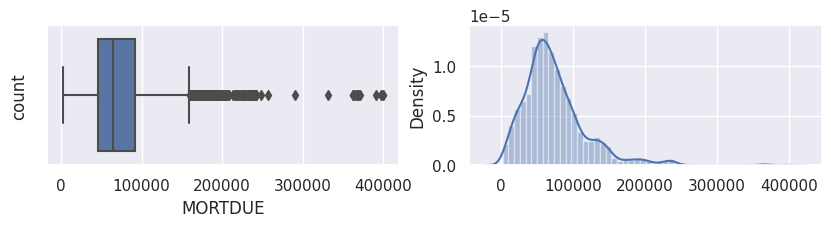

VALUE
Skew : 3.05


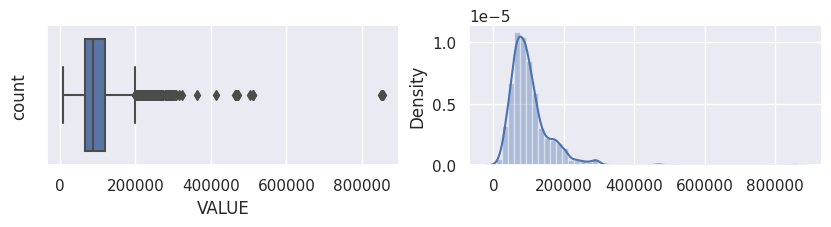

YOJ
Skew : 0.99


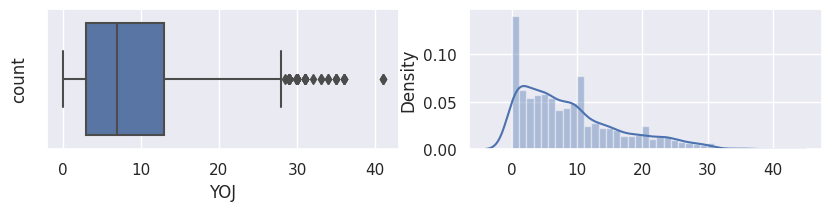

DEROG
Skew : 5.32


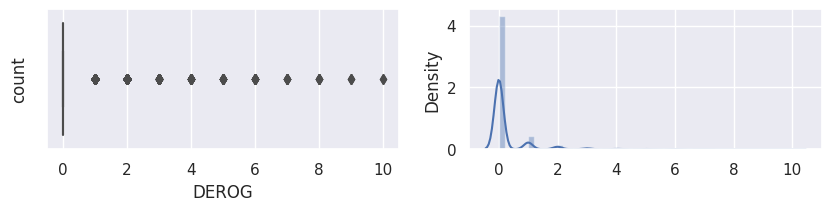

DELINQ
Skew : 4.02


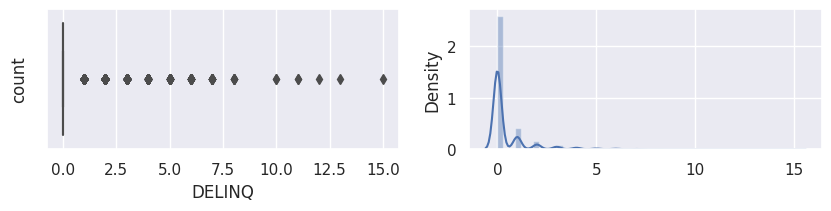

CLAGE
Skew : 1.34


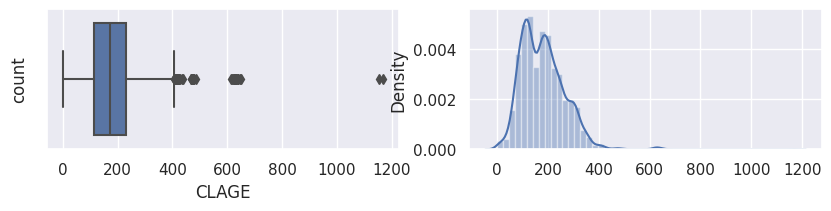

NINQ
Skew : 2.62


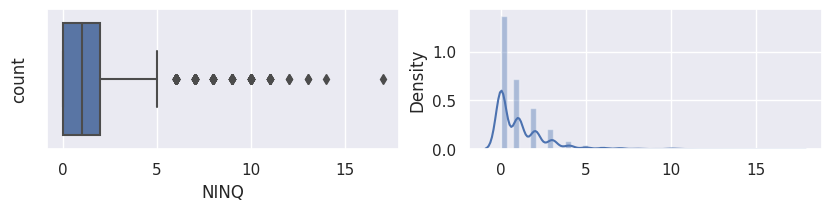

CLNO
Skew : 0.78


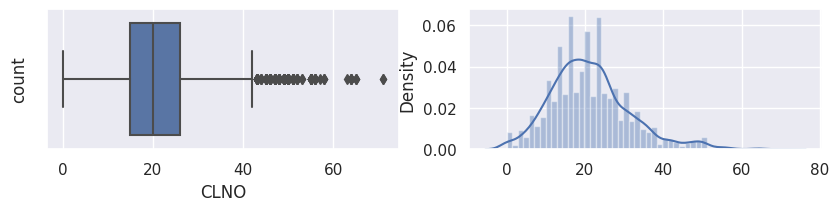

DEBTINC
Skew : 2.85


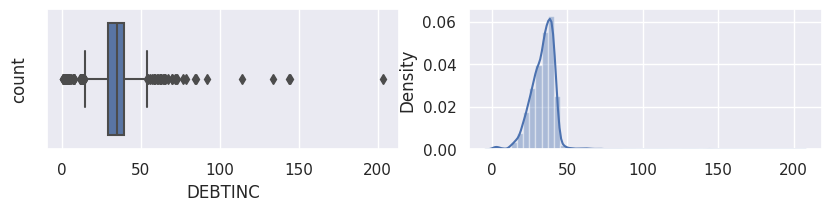

In [ ]:
# Univariate Analysis for Numeric Data

num_data = data.select_dtypes('number')

for col in num_data:
    print(col)
    print('Skew :',round(data[col].skew(), 2))
    plt.figure(figsize = (10,4))
    plt.subplot(2,2,1)
    sns.boxplot(x = data[col])
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.distplot(x=data[col])
    plt.show()

* All numeric features are **right-skewed**, indicating that the mean is greater than the median. We can impute the missing values in these columns by **median**.

* All numeric features have **outliers**. We need to detect and handle them. (later on)

* **DEBTINC** ratio is the only variable that has outliers on both ends. The ones on the left side are the least risky profiles since their Debt/Income ratio is very low. For the ones on the right whisker, the opposite is true.

In [ ]:
# Let's define a function to create countplots indicating percentages for each category.

def perc(plot, col):
    total = len(col) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 6) # annotate the percentage

    plt.show() # show the plot

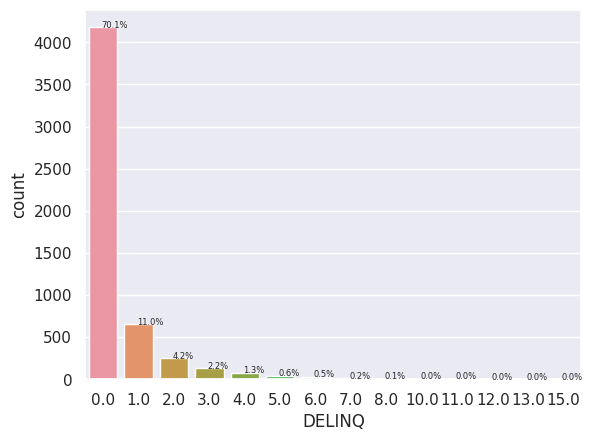

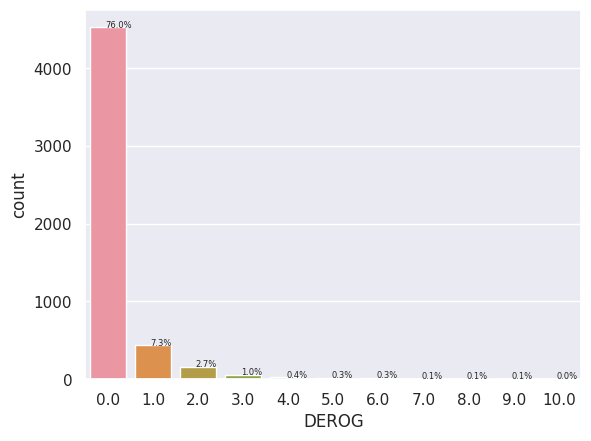

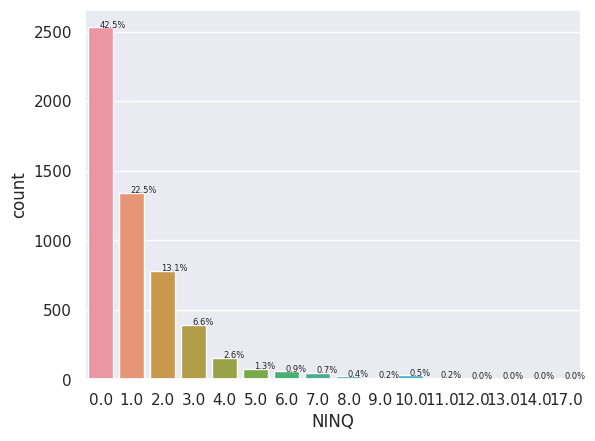

In [ ]:
# Analyze Barplot for features with less unique variables:  -DELINQ, DEROG, NINQ

#Build barplot for DELINQ
ax = sns.countplot(x=data["DELINQ"])
perc(ax,data["DELINQ"])

#Build barplot for DEROG
ax = sns.countplot(x=data["DEROG"])
perc(ax,data["DEROG"])

#Build barplot for NINQ
ax = sns.countplot(x=data["NINQ"])
perc(ax,data["NINQ"])

* DELINQ and DEROG have a few major reports and overdue credit lines.

* 43% of the applicants have no other loan requests and the graph gets lower as the number of loan requests increases.

* Future Action: Since we want ZERO for these features, we may create binary values for them; **Zero or Not?**

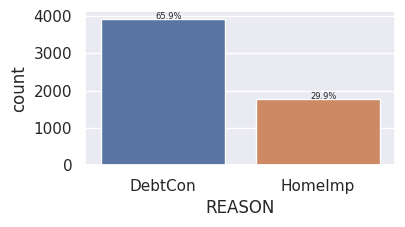

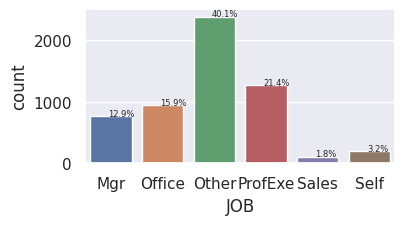

In [ ]:
# Univariate Analysis for Categoric Data

# countplot for REASON
plt.figure(figsize=(4,2))
ax = sns.countplot(x=data["REASON"])
perc(ax,data["REASON"])


# countplot for JOB
plt.figure(figsize=(4,2))
ax = sns.countplot(x=data["JOB"])
perc(ax,data["JOB"])



* 66% of the clients took a loan to pay off other liabilities and consumer debts.

* The JOB types are mostly (40%) labeled as 'Other'.

* As mentioned earlier, we have a lot of missing data and Banks have access to most of this information. But DEBTINC and YOJ can be misleading for this dataset, especially if the customer is self-employed. Luckily we don't have too many clients who refer to their profession as 'Self'. It's a relief.

## **Bivariate Analysis**

**Numeric - Categorical**

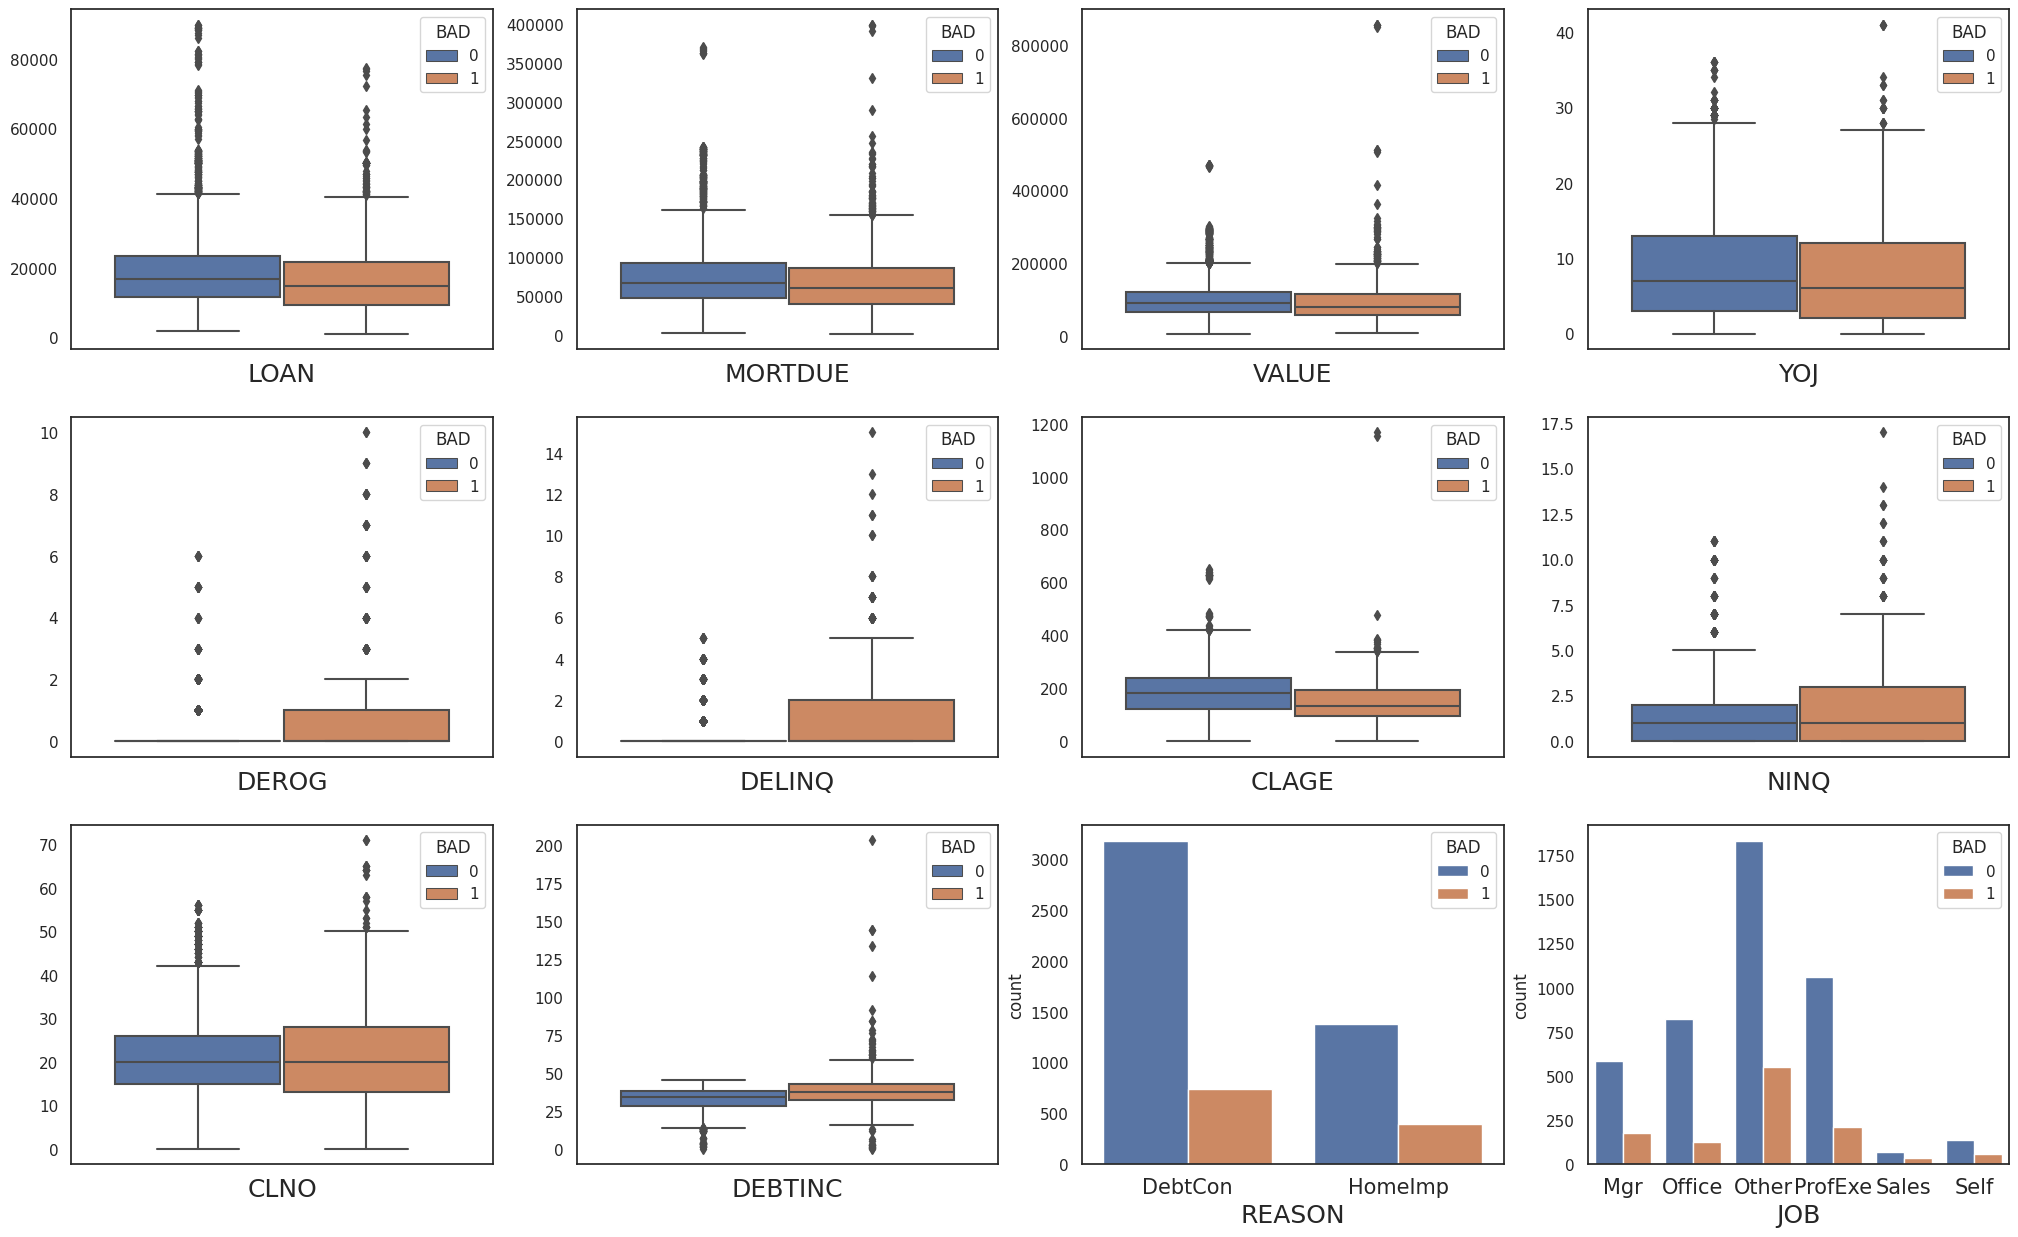

In [ ]:
data1=data[['BAD','LOAN']];data2=data[['BAD','MORTDUE']];data3=data[['BAD','VALUE']];data4=data[['BAD','YOJ']];data5=data[['BAD','DEROG']]
data6=data[['BAD','DELINQ']];data7=data[['BAD','CLAGE']];data8=data[['BAD','NINQ']];data9=data[['BAD','CLNO']];data10=data[['BAD','DEBTINC']];
data1=pd.melt(data1,id_vars="BAD",var_name="features",value_name='value')
data2=pd.melt(data2,id_vars="BAD",var_name="features",value_name='value')
data3=pd.melt(data3,id_vars="BAD",var_name="features",value_name='value')
data4=pd.melt(data4,id_vars="BAD",var_name="features",value_name='value')
data5=pd.melt(data5,id_vars="BAD",var_name="features",value_name='value')
data6=pd.melt(data6,id_vars="BAD",var_name="features",value_name='value')
data7=pd.melt(data7,id_vars="BAD",var_name="features",value_name='value')
data8=pd.melt(data8,id_vars="BAD",var_name="features",value_name='value')
data9=pd.melt(data9,id_vars="BAD",var_name="features",value_name='value')
data10=pd.melt(data10,id_vars="BAD",var_name="features",value_name='value')

plt.figure(figsize=(25,15))
sns.set_style("white")
plt.subplot(3,4,1)
a1 = sns.boxplot(x="features", y="value", hue="BAD", data=data1)
a1.set(xlabel=None,ylabel=None)
a1.set_xticklabels(a1.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,2)
a2 = sns.boxplot(x="features", y="value", hue="BAD", data=data2)
a2.set(xlabel=None,ylabel=None)
a2.set_xticklabels(a2.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,3)
a3 = sns.boxplot(x="features", y="value", hue="BAD", data=data3)
a3.set(xlabel=None,ylabel=None)
a3.set_xticklabels(a3.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,4)
a4 = sns.boxplot(x="features", y="value", hue="BAD", data=data4)
a4.set(xlabel=None,ylabel=None)
a4.set_xticklabels(a4.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,5)
a5 = sns.boxplot(x="features", y="value", hue="BAD", data=data5)
a5.set(xlabel=None,ylabel=None)
a5.set_xticklabels(a5.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,6)
a6 = sns.boxplot(x="features", y="value", hue="BAD", data=data6)
a6.set(xlabel=None,ylabel=None)
a6.set_xticklabels(a6.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,7)
a7 = sns.boxplot(x="features", y="value", hue="BAD", data=data7)
a7.set(xlabel=None,ylabel=None)
a7.set_xticklabels(a7.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,8)
a8 = sns.boxplot(x="features", y="value", hue="BAD", data=data8)
a8.set(xlabel=None,ylabel=None)
a8.set_xticklabels(a8.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,9)
a9 = sns.boxplot(x="features", y="value", hue="BAD", data=data9)
a9.set(xlabel=None,ylabel=None)
a9.set_xticklabels(a9.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,10)
a10 = sns.boxplot(x="features", y="value", hue="BAD", data=data10)
a10.set(xlabel=None,ylabel=None)
a10.set_xticklabels(a10.get_xmajorticklabels(), fontsize = 18)
plt.subplot(3,4,11)
a11 = sns.countplot(x='REASON',hue='BAD',data=data)
a11.set_xticklabels(a11.get_xmajorticklabels(), fontsize = 15)
a11.set_xlabel(a11.get_xlabel(), fontsize=18)
plt.subplot(3,4,12)
a12 = sns.countplot(x='JOB',hue='BAD',data=data)
a12.set_xticklabels(a12.get_xmajorticklabels(), fontsize = 15)
a12.set_xlabel(a12.get_xlabel(), fontsize=18)
plt.show()

* **The above boxplots show that customers with high DEROG, NINQ, DELINQ, DEBTINC and less CLAGE scores in their credit history are less likely to repay their debt and are more likely to default.**

* YOJ, CLNO, VALUE, MORTDUE and LOAN features do not seem to have a significant effect on the repayment of the loan.

* Debt consolidation seems to be the main reason for applying for such loans. Most candidates have defined their job title as Other, and they are the ones who default their loans the most. More detailed analyzes will be made for the REASON and JOB characteristics in the following sections.

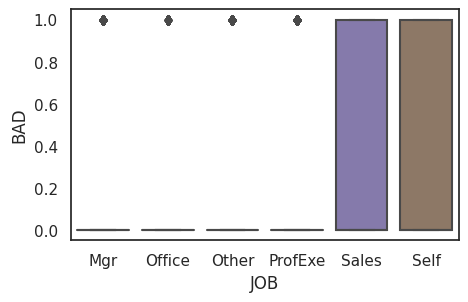

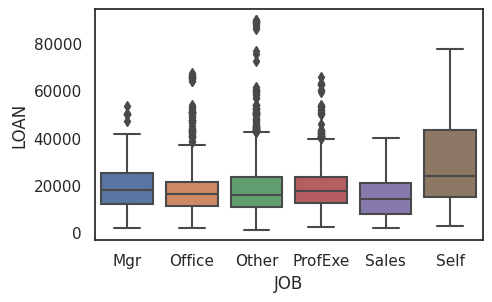

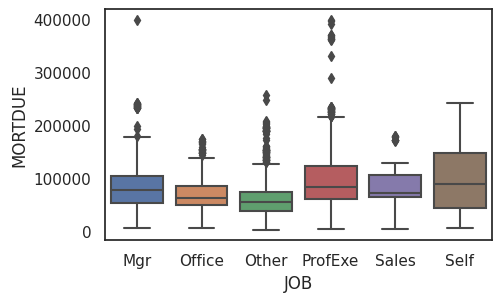

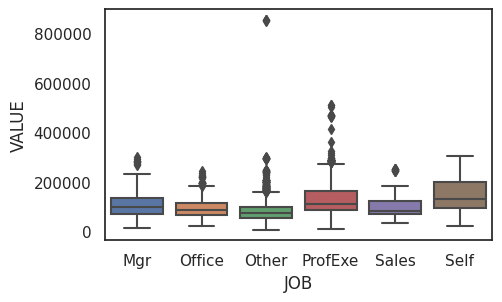

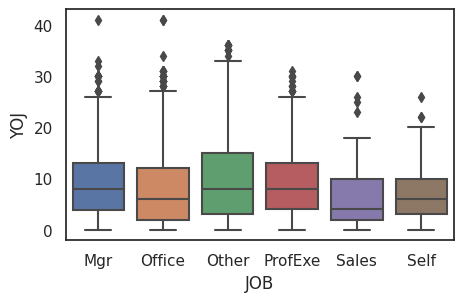

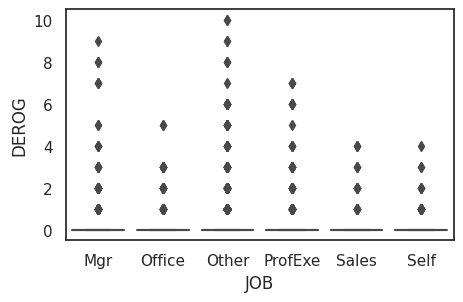

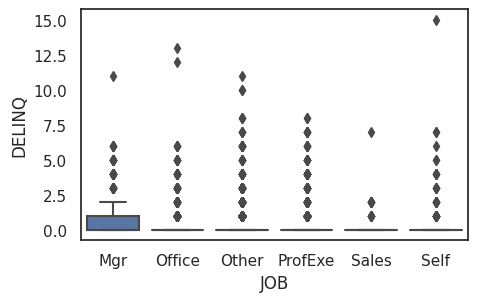

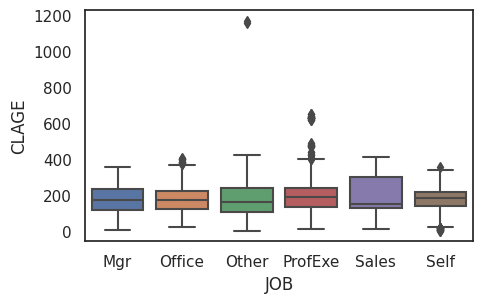

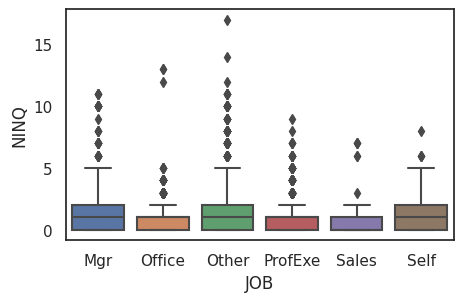

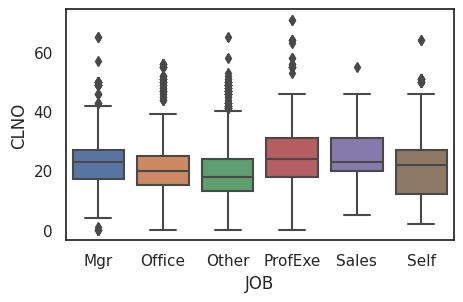

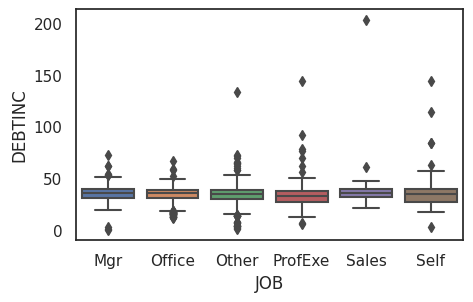

In [ ]:
for n in num_data:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data['JOB'],y=data[n])
    plt.show()


* Self-employed clients, whom we find a bit risky since we have lots of missing values in DEBTINC and YOJ features, are reciving large amounts of loans. Recall that 70% is paid and 30% is defaulted.

* 'Other' is the dominant value of JOB feature (40%). The highest amount of loans are approved for this category and 23% of these loans are defaulted. 'Other' has the highest DEROG and NINQ numbers as well as high YOJ.

**Numeric - Numeric**



In [ ]:
data.loc[data.BAD == 1, 'STATUS'] = 'DEFAULT'
data.loc[data.BAD == 0, 'STATUS'] = 'PAID'

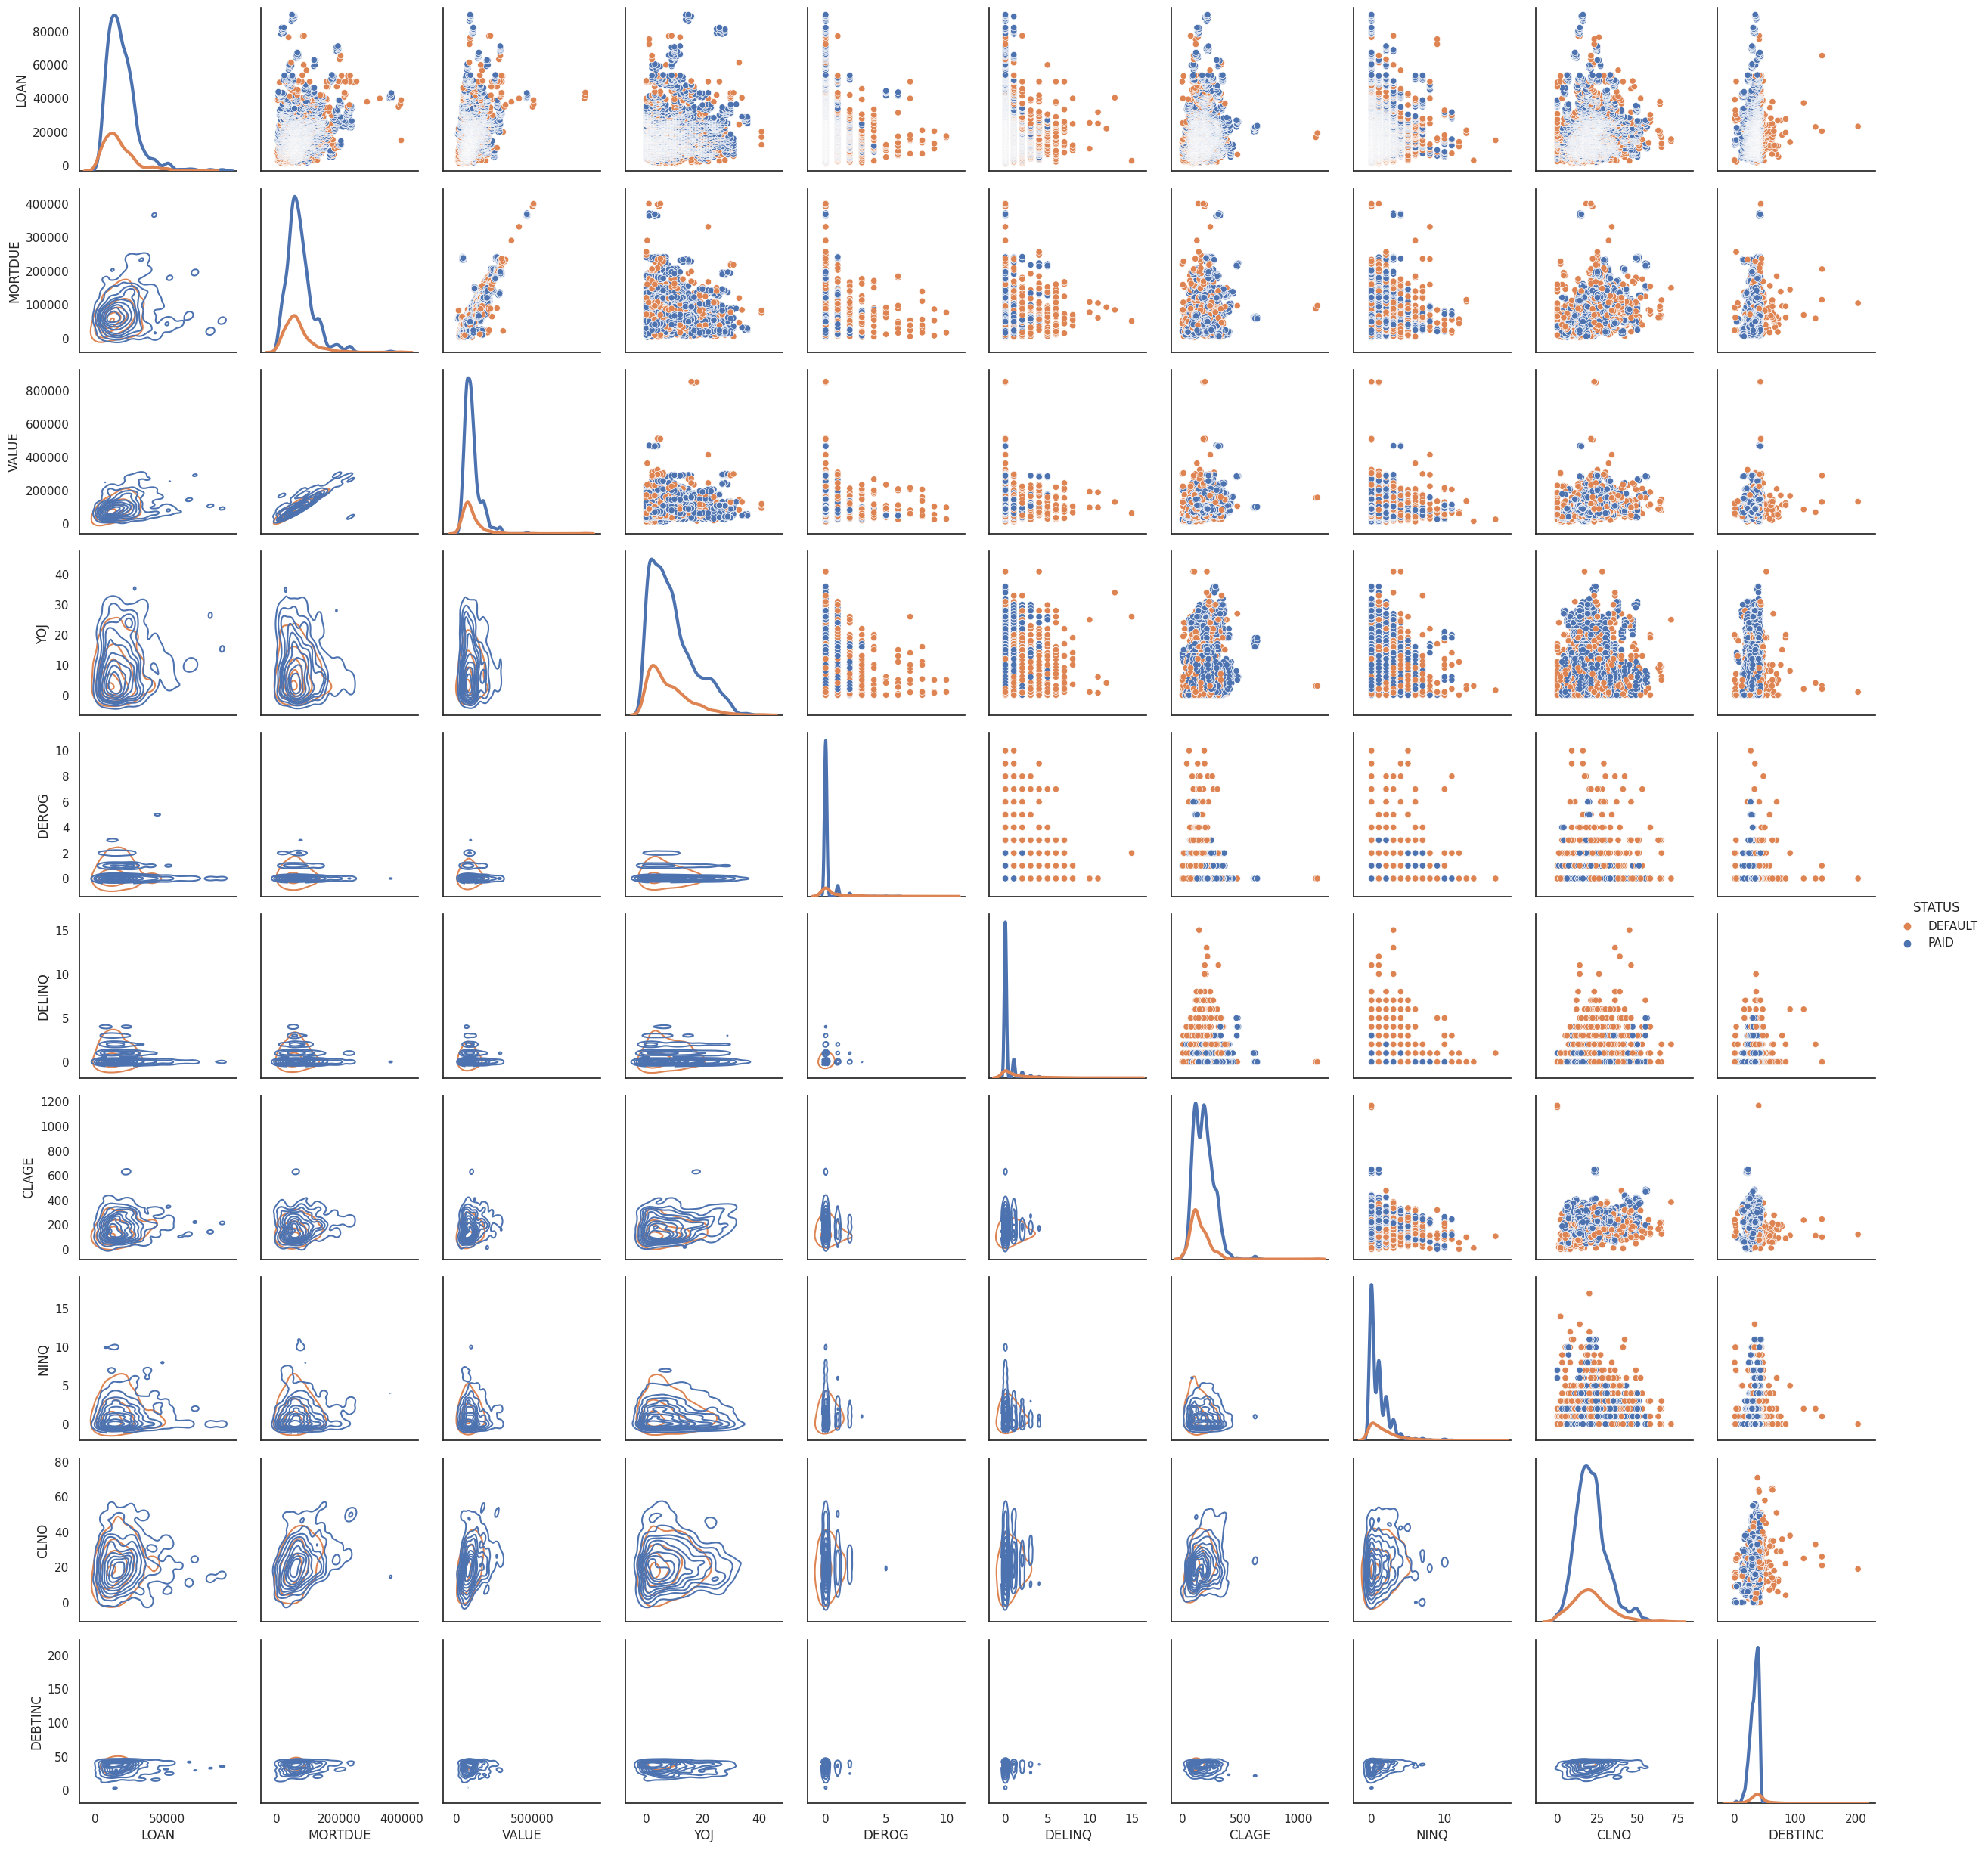

In [ ]:
g=sns.PairGrid(data.drop('BAD',axis=1), hue='STATUS', diag_sharey=False, palette={'PAID': 'C0', 'DEFAULT':'C1'})
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()
plt.show()

* These scatter plots reveal the correlations between numeric features. The most obvious relation is between the **MORTDUE** and **VALUE** features; they are highly correlated in the positive way, which makes sense.

* May not be as clear as Mortdue-Value pair, but we can observe some negatif correlations between;

**DEROG**- YOJ, LOAN, MORTDUE

**DELINQ**- LOAN, MORTDUE, VALUE

**NINQ**- LOAN, VALUE, YOJ, CLAGE

which also make sense, since a record in DEROG, DELINQ or NINQ effects ones credibility in a negative way.

* LOAN is positively associated with work experience and home value. It should also be noted that defaulted loans are mostly given to less experienced customers and/or those whose property has a current value of less than $200,000.

## **Multivariate Analysis**

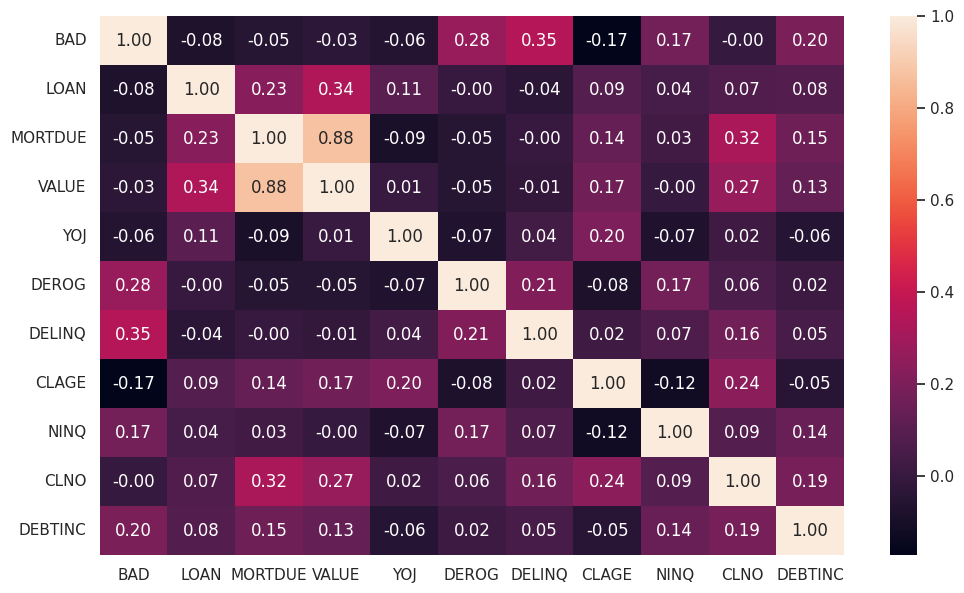

In [ ]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

* The correlation heatmap above visualizes the strength of the relationships between our numerical variables.

* We see strong and positive associations between **BAD** and **DEROG**, **DELINQ**, **DEBTINC**, **NINQ**.

* **DELINQ** is the strongest (35%) of these features to affect credit defaults. The greater the number of outstanding credit lines, the higher the probability of the loan defaulting.

* **CLAGE** has a slightly strong and **negative relationship** with BAD. This is meaningful, since the older the initial credit line, the better the understanding of the customer's credit history and performance.

* Other characteristics (LOAN, MORTDUE, VALUE, YOJ and CLNO) do not appear to have a significant impact on loan defaults.

* There is a strong and positive (88%) relationship betwen **MORTDUE** and **VALUE**.

## **Treating Missing Values**

**Filling the Missing Values – Imputation**

**Action Plan;**

For Numeric Features;

* if the distribution is skewed (asymmetrical), impute by the **median** and otherwise by the **mean**.

For Categorical Features;

* impute by the most frequent value (the **mode**).
We can also use the mode for numeric features with few unique values.

Since all the numeric features have **skewed distrubitions**, we will fill the missing values in those columns with **median** and mode for categorical variables.

In [ ]:
# Treat Missing values in numerical columns with median and mode in categorical variables

# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [ ]:
#checking that there are no missing values
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
STATUS     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
 13  STATUS   5960 non-null   object  
dtypes: category(2), float64(9), int64(2), object(1)
memory usage: 570.9+ KB


## **Treating Outliers**

In [ ]:
def treat_outliers(dff,col):
    Q1=dff[col].quantile(0.25)       # 25th quantile
    Q3=dff[col].quantile(0.75)       # 75th quantile
    IQR=Q3-Q1                       # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR    # define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR    # define upper whisker
    dff[col] = np.clip(dff[col], Lower_Whisker, Upper_Whisker)
    return dff

In [ ]:
def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [ ]:
df_raw = data.copy()

numerical_col = ['LOAN', 'VALUE', 'YOJ','CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

data = treat_outliers_all(df_raw,numerical_col)

Alright, now we solved the outliers issue! Let's see the heatmap again to get more insight about the relationships between our variables.

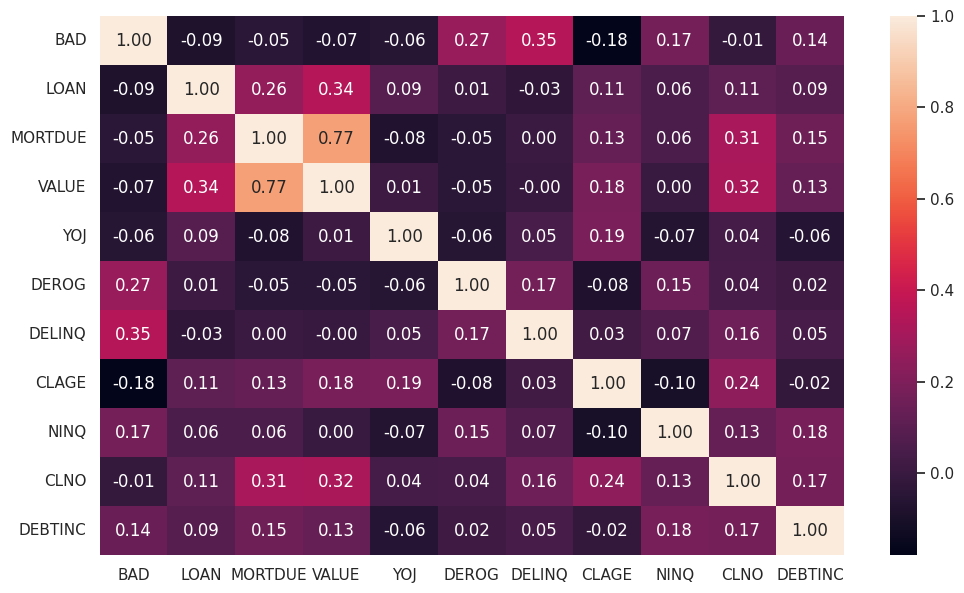

In [ ]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

In [ ]:
data.corr()['BAD'].sort_values(ascending=False)

BAD        1.000000
DELINQ     0.346503
DEROG      0.269921
NINQ       0.172850
DEBTINC    0.140924
CLNO      -0.014503
MORTDUE   -0.046186
YOJ       -0.055870
VALUE     -0.071702
LOAN      -0.085027
CLAGE     -0.178428
Name: BAD, dtype: float64

* Above heatmap shows the correlations after imputing the missing numbers and treating the outliers.

* Again, we see strong and positive associations between BAD and DEROG, DELINQ, DEBTINC, NINQ.

* Still **DELINQ** is the strongest **(35%)** of these features to affect credit defaults. Remember, the greater the number of outstanding credit lines, the higher the probability of the loan defaulting.

* CLAGE has a slightly strong and negative relationship with BAD, same as with the heatmap analysed before.

* Other characteristics (LOAN, MORTDUE, VALUE, YOJ and CLNO) do not appear to have a significant impact on loan defaults.

* The strong and positive (88%) relationship betwen MORTDUE and VALUE has drop to 77% which is still very strong. We may consider dropping MORTGAGE or VALUE as they are highly correlated, but both of these attributes are crucial to a mortgage transaction, so we will retain both to avoid loss of information.

**Perfect! Now, we have a dataset without missing values and outliers.**

Before moving on to the ML algorithms, let's create some extra columns to see if we can capture new insights.



In [ ]:
# More Summary Statistics for the Categorical Features
data.describe(include=['category']).T

,count,unique,top,freq
REASON,5960,2,DebtCon,4180
JOB,5960,6,Other,2667


In [ ]:
g = data.groupby('REASON')
g['STATUS'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

In [ ]:
g = data.groupby('JOB')
g['STATUS'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

* According to this chart, the occupation of a client plays an important role in likelihood of default.

* **Office workers** and **professional executives** have the highest likelihood of paying their loans, while **salespeople** and the **self-employed** clients have the highest likelihood of default.

* **The JOB feature shows a good discriminating power and most likely be an important feature of our classification model.**

* As we examined earlier, the REASON feature has two distinct values; DebtCon and HomeImp, with DebtCon being the more common (70% of this feature). Regardless of the reason for borrowing, we find that 20% of debtors in both categories do not repay their debts. Therefore, the REASON feature may not have a significant impact on credit defaults.

In [ ]:
# More Analysis for the Most Effective Features DEROG, DELINQ, DEBTINC and NINQ

In [ ]:
data.loc[data.DEROG >= 1, 'DEROG+'] = 'YES'
data.loc[data.DEROG < 1, 'DEROG+'] = 'NO'

In [ ]:
g = data.groupby('DEROG+')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")


* Half of customers with at least one major derogatory report defaulted on their loans, while 84% of customers without any DEROG records repaid their debts. **DEROG is a significant factor affecting the loan repayment status.**

In [ ]:
data.loc[data.DELINQ >= 1, 'DELINQ+'] = 'YES'
data.loc[data.DELINQ == 0, 'DELINQ+'] = 'NO'

In [ ]:
g = data.groupby('DELINQ+')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

* Likewise, nearly half of customers with at least one delinquent credit line defaulted on their loans, while 86% of customers without any DELINQ records repaid their debts. **DELINQ is a significant factor affecting the loan repayment status.**

In [ ]:
data.loc[data.DEBTINC >= 43, 'DEBTINC+']='High' # Usually the benchmark for DEBTINC ratio is 43 in banking industry
data.loc[data.DEBTINC < 43, 'DEBTINC+'] ='Low'

In [ ]:
g = data.groupby('DEBTINC+')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

* Nearly half of customers with a high debt-to-income ratio (equal to or greater than 43) defaulted on their loans, while 80% of customers with a lower DEBTINC ratio paid off their debts. **DEBTINC is an important factor affecting loan repayment status.**

In [ ]:
data.loc[data.NINQ >= 1, 'NINQ+']='YES'
data.loc[data.NINQ < 1, 'NINQ+'] ='NO'

In [ ]:
g = data.groupby('NINQ+')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

* 16% of the customers without any NINQ record defaulted on their loans whereas this ratio is 23% for the customers with at least 1 NINQ on their credit report. NINQ seems to have an effect but not that significant.

In [ ]:
data.loc[data.CLAGE >= 180, 'CLAGE+']='HIGH'
data.loc[data.CLAGE < 180, 'CLAGE+'] ='LOW'

In [ ]:
g = data.groupby('CLAGE+')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

25% of the customers with the age oldest credit line less than 180 months defaulted on their loans, while only 13% of customers with high CLAGE defaulted. **CLAGE is a significant factor affecting the loan repayment status.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   BAD       5960 non-null   int64   
 1   LOAN      5960 non-null   int64   
 2   MORTDUE   5960 non-null   float64 
 3   VALUE     5960 non-null   float64 
 4   REASON    5960 non-null   category
 5   JOB       5960 non-null   category
 6   YOJ       5960 non-null   float64 
 7   DEROG     5960 non-null   float64 
 8   DELINQ    5960 non-null   float64 
 9   CLAGE     5960 non-null   float64 
 10  NINQ      5960 non-null   float64 
 11  CLNO      5960 non-null   float64 
 12  DEBTINC   5960 non-null   float64 
 13  STATUS    5960 non-null   object  
 14  DEROG+    5960 non-null   object  
 15  DELINQ+   5960 non-null   object  
 16  DEBTINC+  5960 non-null   object  
 17  NINQ+     5960 non-null   object  
 18  CLAGE+    5960 non-null   object  
dtypes: category(2), float64(9), int64(2), object(6)


# **Model Building Approach**

1. **Data preparation:** Preprocessing our data by performing any necessary cleaning, feature selection, scaling, and encoding.

2. **Defining the model:** Choosing appropriate algorithms and defining the models.

3. **Defining the evaluation metric:** Choosing appropriate evaluation metrics that measures the performance of the model.

4. **Cross-validation:** We will use StratifiedKFold to perform cross-validation on the entire dataset. This helps us to estimate the performance of the model and reduces overfitting.

5. **Hyperparameter tuning:** We will use grid search to tune the hyperparameters of the model.

6. **Fitting the model:** Then, we are going to fit the model on the entire dataset again, using the optimal hyperparameters obtained from the grid search.

7. **Evaluating the model:** Evaluating the performance of the model using the evaluation metric chosen in step 3. This involves computing the performance metric for each fold in the cross-validation and averaging the results to obtain an estimate of the model's performance.

8. **Comparing models:** Comparing performances of the models on the evaluation metric to determine the best-performing model.





### **Data Preparation**

* Some of our numeric features (i.e.LOAN and MORTDUE) have a very wide range of entries. We will apply **Feature Scaling** to our dataset to standardize the range of independent variables.

* We have 2 categorical features. Before moving on to building our models, we'll **encode** them since most of the models we'll be using work with numerical features.



In [ ]:
# For the simplicity of modelling we will drop below features we created;

data.drop("STATUS",axis=1,inplace=True)
data.drop("DEROG+",axis=1,inplace=True)
data.drop("DELINQ+",axis=1,inplace=True)
data.drop("DEBTINC+",axis=1,inplace=True)
data.drop("NINQ+",axis=1,inplace=True)
data.drop("CLAGE+",axis=1,inplace=True)

In [ ]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
df = pd.get_dummies(data, drop_first=True)

df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,0,1,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,1,0,0,0,0


In [ ]:
# Separating the target variable and features
X=df.drop(columns=['BAD'],axis=1)
y=df['BAD']

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Defining The Classification Models**

When dealing with **imbalanced datasets**, it is important to choose the machine learning algorithms which can handle this challenge effectively.

There are several machine learning algorithms that can handle imbalanced data well. We will apply these nine models below:

**1-Logistic Regression:** Logistic Regression is a popular model for binary classification problems like mortgage default prediction. It is simple, interpretable, and performs well with large datasets. Logistic Regression can also handle imbalanced data well by using class weighting or resampling techniques.

**2-K-Nearest Neighbors (KNN):** KNN is a simple and effective algorithm that can handle missing data. It works by finding the K-nearest neighbors of a data point and assigning it to the most common class among its neighbors. KNN can handle missing data by using imputation techniques such as mean imputation or median imputation.

**3-Support Vector Machines (SVM):** SVM is a powerful algorithm that can handle imbalanced data and missing data. It works by creating a hyperplane that separates the data points into different classes. SVM can handle missing data by using a variety of imputation techniques such as mean imputation or K-nearest neighbors imputation.

**4-Decision Tree:** Decision Tree works by partitioning the feature space into regions, and assigning a class label to each region based on the majority class of the training samples in that region. They can handle imbalanced data by adjusting the decision threshold, or by using techniques such as weighted classes or cost-sensitive learning to prioritize the minority class.

**5-Random Forest:** Random Forest is an ensemble learning algorithm that can handle high-dimensional datasets with non-linear relationships between the features and the target variable. It can also handle imbalanced data well by reducing the variance in the model.

**6-Gradient Boosting:** Gradient Boosting is another ensemble learning algorithm that can handle imbalanced data well and can achieve high predictive accuracy. It is particularly useful for problems with complex non-linear relationships between the features and the target variable.

**7-XGBoost:** XGBoost is an advanced implementation of Gradient Boosting that is known for its high performance and ability to handle imbalanced data and missing data. XGBoost can handle missing data by using the mean or median value to impute missing values in numerical features.

**8-LightGBM:** LGBM is another popular machine learning algorithm that can handle imbalanced data well. It is a gradient boosting framework that is optimized for speed and efficiency. It has the ability to handle imbalanced data by using a weighted approach to the loss function. It also supports other techniques such as bagging and feature sub-sampling, which can help to improve model performance on imbalanced data.

**9-AdaBoost:** AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that combines weak learners to create a strong learner. In the context of imbalanced data, AdaBoost can be particularly effective because it assigns higher weights to misclassified samples, which helps to improve the model's ability to correctly classify minority class samples.

### **Defining the Evaluation Metrics**

Model can make wrong predictions as:

* Predicting a customer who will  actually repay the debt as  'default'.

* Predicting a customer who will NOT actually repay the debt as 'will not default'.

**Which case is more important?**

If we anticipate that a customer who will actually pay off the loan as 'default', the bank loses a potential customer and interest yield.

If we anticipate that a customer who does not actually pay off the loan as 'will not default', the bank loses its resources, loses the money that it lent to the customer **which may be a bigger loss for banks.**





### **How to reduce the losses?**

**For our problem, where the objective is to classify borrowers as either likely to default or likely to repay their loans, the metric that should be used for the classification model depends on the business objective of the bank:**

* If the bank's primary concern is **to avoid lending money to borrowers who are likely to default**, then **recall** is the most important metric. Recall measures the proportion of true positives (i.e., borrowers who are correctly identified as likely to default) among all actual positives (i.e., all borrowers who actually defaulted). A high recall means that the bank can identify most of the borrowers who will actually default, reducing the risk of lending money to risky borrowers.

* On the other hand, if the bank's primary concern is **to retain good customers who will repay their loans**, then **precision** is the most important metric. Precision measures the proportion of true positives (i.e., borrowers who are correctly identified as likely to default) among all borrowers predicted to be likely to default. In other words, precision measures the accuracy of the model's positive predictions, and a high precision means that the bank can identify most of the borrowers who will actually default, reducing the risk of losing good customers who are mistakenly identified as risky.

* However, in practice, banks would likely want **to balance both** precision and recall to achieve their business objective. In this case, **the F1 score**, which balances both precision and recall, would be a good metric to use.

* **ROC-AUC score** is also a useful metric for evaluating a classification model for the HMEQ dataset, as it measures the ability of the model to correctly distinguish between positive (i.e., borrowers who default) and negative (i.e., borrowers who do not default) cases across different classification thresholds. However, ROC-AUC score is not necessarily the best metric if the business objective of the bank is to minimize the number of bad loans while also keeping a good proportion of good loans. This is because ROC-AUC score does not take into account the balance between the two classes, and it may be heavily influenced by the class distribution.
* Therefore, in this specific case, it may be better to focus on metrics that directly measure the model's performance in identifying the positive class (i.e., borrowers who default), such as recall, and F1 score. By considering multiple metrics, we can get a more complete understanding of the model's performance and choose the one that is most appropriate for the bank's business objective.



---



### **Cross-Validation Technique**

* As we mentioned earlier, HMEQ dataset is mildly imbalanced and with imbalanced data models can get biased. In general, if the imbalanced data is not too severe, **cross-validation** may be a good choice because it can provide a measure of the model's performance without the need to modify the original data. However, if the imbalance is more severe, **oversampling** may be necessary to improve the performance of the model on the minority class. It's also worth noting that oversampling can increase the risk of overfitting.

* We will use the **Stratified Cross-Validation** technique to ensure that each fold of the cross-validation contains a proportional representation of each class in the dataset.

## **Building The Classification Models**

**Logistic Regression, Support Vector Machines, K-Nearest Neighbors, Decision Trees, Random Forests, Gradient Boosting, XGBoost, AdaBoost and LightGBM**

Since we decided on our evaluation metrics, now it's time to build our classification models!

* First' we are going to define a list of classifiers that will be evaluated, including logistic regression, support vector machines, k-nearest neighbors, decision trees, random forests, gradient boosting, XGBoost, AdaBoost, and LightGBM
* Define a dictionary of scoring metrics, which will be used to evaluate the performance of the classifiers
* We then use cross_val_score() to evaluate each model using **5-fold stratified cross-validation**
* Finally, we will print the mean scores for each metric for each classifier and determine the best performing model based on the mean F1-score!

In [ ]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    LGBMClassifier()
]

# Define the stratified KFold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Evaluate each classifier using cross-validation
results = {}
for clf in classifiers:
    scores = cross_validate(clf, X_scaled, y, cv=skf, scoring=scoring)
    results[clf.__class__.__name__] = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision': np.mean(scores['test_precision']),
        'recall': np.mean(scores['test_recall']),
        'f1': np.mean(scores['test_f1']),
        'roc_auc': np.mean(scores['test_roc_auc'])
    }

# Print the results in a table
print('{:<30} {:<10} {:<10} {:<10} {:<10} {:<10}'.format(
    'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'))
for clf_name, clf_scores in results.items():
    print('{:<30} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}'.format(
        clf_name, clf_scores['accuracy'], clf_scores['precision'],
        clf_scores['recall'], clf_scores['f1'], clf_scores['roc_auc']))

# Determine the best performing model based on the mean F1-score
best_model = max(results, key=lambda x: results[x]['f1'])
print(f'\nThe best performing model is {best_model} with an F1-score of {results[best_model]["f1"]:.2f}.')


Classifier                     Accuracy   Precision  Recall     F1-score   AUC-ROC   
LogisticRegression             0.83       0.75       0.30       0.42       0.79      
SVC                            0.83       0.63       0.40       0.48       0.80      
KNeighborsClassifier           0.82       0.62       0.42       0.49       0.78      
DecisionTreeClassifier         0.61       0.33       0.60       0.40       0.61      
RandomForestClassifier         0.73       0.64       0.62       0.56       0.86      
GradientBoostingClassifier     0.65       0.54       0.52       0.42       0.78      
XGBClassifier                  0.63       0.39       0.47       0.34       0.72      
AdaBoostClassifier             0.69       0.57       0.47       0.39       0.78      
LGBMClassifier                 0.62       0.48       0.51       0.36       0.72      

The best performing model is RandomForestClassifier with an F1-score of 0.56.


Based on these analyzes with **default parameters**, the Random Forest Classifier appears to be the best performer out of nine. To improve the performance of the classifiers on the HMEQ dataset, we can try the following:

* Hyperparameter tuning to identify the optimal hyperparameters that can improve the performance of the classifiers.
* Feature selection and engineering to identify and create relevant features that can improve the performance of the classifiers. We can use techniques such as correlation analysis, principal component analysis, and feature importance analysis to select and engineer features.




### **Hyperparameter Tuning**

Let's fine-tune the parameters of the ensemble classifiers (Random Forest, Gradient Boosting, XGBoost, Adaboost, and LightGBM) and find the best one based on the metrics we've agreed upon. We will loop through the models and use GridSearchCV to find the best hyperparameters for each model using StratifiedKFold cross-validator. For each model, we are going to print out the best hyperparameters, Precision, Recall, F1-score, and Best F1-score which is the harmonic mean of precision and recall.


In [ ]:
from tabulate import tabulate
# define the models to be fine-tuned
models = [
    ('rf', RandomForestClassifier(), {'n_estimators': [100,300, 500], 'max_depth': [None, 10, 20]}),
    ('gb', GradientBoostingClassifier(), {'n_estimators': [100, 500], 'max_depth': [None, 10, 20]}),
    ('xgb', XGBClassifier(), {'n_estimators': [100, 500], 'max_depth': [None, 10, 20]}),
    ('ada', AdaBoostClassifier(), {'n_estimators': [100, 500]}),
    ('lgbm', LGBMClassifier(), {'n_estimators': [100, 500], 'max_depth': [-1, 10, 20]})
]

# perform grid search with stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=cv, scoring=['recall', 'f1', 'roc_auc'], refit='f1')
    grid.fit(X_scaled, y)
    best_score = grid.best_score_
    results.append((name, best_score))

# create a DataFrame from the results and print it using tabulate
df_results = pd.DataFrame(results, columns=['Model', 'Mean F1-score'])
df_results.set_index('Model', inplace=True)
table = tabulate(df_results, headers='keys', tablefmt='psql')
print(table)



+---------+-----------------+
| Model   |   Mean F1-score |
|---------+-----------------|
| rf      |        0.781946 |
| gb      |        0.80718  |
| xgb     |        0.805641 |
| ada     |        0.714683 |
| lgbm    |        0.816444 |
+---------+-----------------+


* Based on the mean F1 scores, it looks like LightGBM (lgbm) has the best performance with a score of 0.816. Extreme Gradient Boosting (xgb) and Gradient Boosting (gb) also have good performance with scores of 0.805 and 0.807 respectively. Random Forest (rf) has a decent score of 0.780, while AdaBoost (ada) has the lowest score of 0.715.

* It's important to keep in mind that the best performing model may not necessarily be the best choice for this particular problem. Other factors such as training time, interpretability, and computational resources required also need to be considered when choosing a model.

**We will compare Tuned RF (winner of previous analysis) with Tuned LGBM (winner of fine-tuning).**

* **Training time:** Random Forest (rf) is generally faster to train than LightGBM (lgbm), especially for small to medium-sized datasets like ours. However, for very large datasets with millions of rows and many features, LightGBM (lgbm) may be faster.

* **Interpretability:** Random Forest (rf) is generally more interpretable than LightGBM (lgbm) because it uses an ensemble of decision trees rather than a gradient boosting algorithm.

* **Performance:** Based on the F1 scores, LightGBM (lgbm) has better performance than Random Forest (rf).

* **Computational resources:** LightGBM (lgbm) may require more computational resources than Random Forest (rf) because it uses a gradient boosting algorithm that can be more computationally intensive.

* In summary, if we prioritize performance over interpretability and computational resources, LightGBM (lgbm) may be the better choice. However, if we need a model that is faster to train and more interpretable, Random Forest (rf) may be the better choice. Ultimately, the best choice depends on specific needs and constraints.


**Decision:**

We will chose **Tuned Random Forest** classification model since it's faster to train, more interpretable, requires less computational resources and performs pretty well on mildly imbalanced HMEQ Dataset.

### **Feature Importance Analysis**

Let's see feature importances to gain insights into how the Tuned Random Forest model makes predictions.



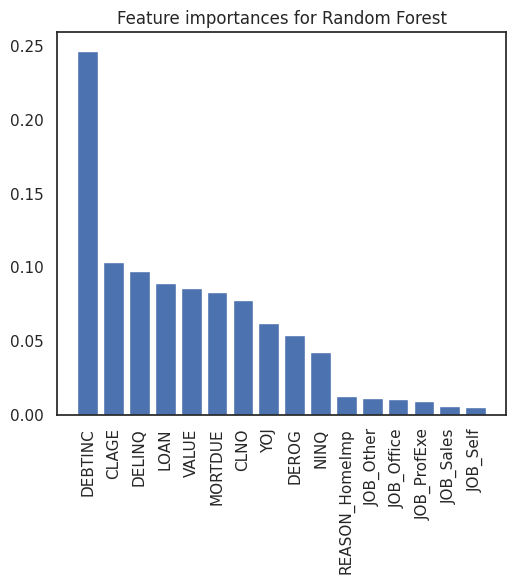

In [ ]:
# Define the features
features = X.columns

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42)
rf_model.fit(X_scaled, y)

# Extract the feature importances for Random Forest
rf_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
rf_importances = rf_importances.sort_values('Importance', ascending=False)

# Plot the feature importances for both models
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(rf_importances['Feature'], rf_importances['Importance'])
plt.xticks(rotation=90)
plt.title('Feature importances for Random Forest')

plt.tight_layout()
plt.show()

**Observations:**

* **DEBTINC** is by far the most important feature, followed by **CLAGE**, **DELINQ**, **LOAN**, **VALUE**, **MORTDUE**, and **CLNO**.

* YOJ, DEROG, and NINQ also have some influences, but not as significant as the aboves.

* Our two categorical features, REASON and JOB, do not seem to be very effective in predicting credit defaults.



Based on our EDA observations, DELINQ appeared to have the greatest impact on probability of default, followed by DEROG, DEBTINC, and NINQ. However, when using the Tuned Random Forest model, the importance of features changed, with **DEBTINC** being identified as the most important feature.

This difference in feature importance may be due to the fact that the Tuned Random Forest model takes into account interactions between features, which can result in a different ranking of importance compared to an analysis based solely on univariate associations.



# **Executive Summary, Conclusion and Recommendations:**


# **Executive Summary**
The purpose of this project is to identify the main factors contributing to credit default and develop a robust classification model to estimate the probability of default risk. To achieve this aim, the HMEQ dataset, which contains information about borrowers' characteristics, credit history and credit performance, was analyzed.

After evaluating multiple models, we found that Tuned Random Forest outperformed the other models in terms of training time, interpretability, and computational resources. It achieved an impressive F1 score of 78%, indicating that the model is performing well in both minimizing false positives (precision) and correctly identifying positive cases (recall). This is important in the context of credit risk assessment, as minimizing false positives can help prevent unnecessary declines of credit applications, while maximizing recall can help identify high-risk borrowers and mitigate the risk of default.

The model identified several important factors that impact loan defaults, including debt-to-income ratio, age of the oldest credit line in months, number of delinquent credit lines, the amount of the loan, the value of the property used as collateral, amount due on the existing mortgage, and number of existing credit lines.

Based on our findings, we recommend that banks and lenders deploy the Tuned Random Forest model, review and adjust their loan policies, regularly update the model, and train loan officers to use the model's predictions to make informed lending decisions. This approach can lead to more responsible lending practices, reduced risk, and improved financial outcomes for both borrowers and lenders.
## **Overview of the Problem**
Bad loans or non-performing assets (NPAs) can significantly impact a bank's profitability and stability, making it necessary to be cautious when approving loans to customers.
Accurately predicting the likelihood of loan defaults is essential for banks to manage credit risk effectively. This allows banks to make informed decisions about loan approvals and identifying potential issues before they become significant problems.
Traditionally, the loan approval process involves a manual review of various aspects of the loan application, including the borrower's creditworthiness.


## **Approach for the Solution**
A detailed exploratory data analysis was carried out to reveal hidden patterns and relationships that could inform decisions and guide further analysis.
Nine powerful machine learning algorithms were applied, including Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Gradient Boosting, XGboost, LightGBM, and AdaBoost.
The final proposed solution design involves using the Tuned Random Forest model to estimate the probability of credit default, which uses 13 features to predict whether a borrower is likely to default.


## **Key Findings and Insights**
Using machine learning in credit risk management has the potential to increase the efficiency and accuracy of the credit approval process while minimizing the credit risk.
The Tuned Random Forest model provides valuable insights into the factors contributing to loan defaults and can help banks and lenders manage risk more effectively.
The most important factors driving the loan default process are debt-to-income ratio, age of the oldest credit line in months, number of delinquent credit lines, the amount of the loan, the value of the property used as collateral, amount due on the existing mortgage, and number of existing credit lines.





## **Conclusions**

The analysis of the HMEQ dataset has yielded valuable insights into the factors that contribute to loan defaults. Out of the various classification models tested, **the Tuned Random Forest model** has performed the best, achieving a **78% F1-score**. With this model, banks can now more accurately identify which loans are more likely to default, enabling them to allocate resources more effectively.

The most important factors driving the loan default process, as determined by the model, are DEBTINC, CLAGE, DELINQ, LOAN, VALUE, MORTDUE and CLNO.

**DEBTINC** (Debt-to-Income Ratio) is an essential factor in determining whether a borrower will be able to pay back their loan. If a borrower's debt-to-income ratio is high, it means they may have trouble making their payments on time, increasing the risk of default.

**CLAGE**, which is the age of the oldest credit line in months, can provide insights into the borrower's credit history and how long they have been managing credit. A longer credit history may indicate that the borrower has more experience managing credit and may be less likely to default.

**DELINQ,** which is the number of past-due payments on the borrower's credit report, can be an important indicator of their payment history and their willingness to make timely payments. A high number of past-due payments may indicate that the borrower has a history of delinquency and may be at a higher risk of default.

**LOAN and VALUE** represent the amount of the loan and the value of the property used as collateral for the loan, respectively. A high loan-to-value ratio increases the likelihood of default, as it suggests that the borrower may not have enough equity in their property to cover the loan in the event of default.

**MORTDUE** (Amount Owed on Mortgage) represents the amount owed on the borrower's mortgage, which can be a good indicator of their overall financial health. A high mortgage balance may indicate that the borrower is over-leveraged and may have difficulty making loan payments.

**CLNO** (the number of credit lines) is another important factor in predicting loan defaults. A higher number of credit lines may indicate that the borrower has more access to credit and may be more likely to take on additional debt, increasing the risk of default. However, a lower number of credit lines may also be a red flag, as it may indicate that the borrower has limited credit history and may be less experienced in managing credit. Thus, CLNO can provide valuable insights into a borrower's credit profile and their overall creditworthiness.

By understanding these key factors, banks can make more informed decisions about lending practices and risk management, ultimately reducing the likelihood of loan defaults and improving their overall financial health.


## **Further Improvements & Recommendations & Key Risks and Challenges**

### **Feature Engineering**



Based on the feature importances we identified, Banks can design some new features. They need to consider how different combinations of features can help better understand the key factors contributing to the risk of default in the HMEQ dataset. Here are some ideas using the most important features from tuned random forest model;

* **Credit utilization ratio:** we can calculate the ratio of "DEBTINC" (debt-to-income ratio) to "CLNO" (number of credit lines) to see if it has any predictive power. A low value of this ratio may indicate a borrower who is not heavily indebted relative to the number of credit lines they have, which could be a positive sign for loan repayment.

* **Credit history score:** we can create a new feature that assigns a score to each borrower based on their credit history. For example, we can assign a score of 1 to borrowers whose "CLAGE" (age of oldest credit line in months) is less than 12 months, 2 to those whose "CLAGE" is between 12 and 24 months, and so on, up to a score of 10 for borrowers whose "CLAGE" is more than 120 months. This score can then be used as a predictor in our models.

* **Payment-to-income ratio:** we can calculate the ratio of "MORTDUE" (amount of mortgage due) to "YOJ" (years at current job) to see if it has any predictive power. A low value of this ratio may indicate a borrower who has a high income relative to their mortgage debt and job stability, which could be a positive sign for loan repayment.

* **Delinquent Credit Lines and Recent Credit Inquiries:** we can create a new feature by adding together the number of delinquent credit lines (DELINQ) and the number of recent credit inquiries (NINQ). This way we can identify individuals who have a history of financial instability or who may be actively seeking new credit, both of which may increase the risk of default.

* **Proportion of Mortgage Due to Loan Amount:** we can calculate the ratio of amount of the mortgage due (MORTDUE) to the amount of the loan (LOAN) and find out individuals who may be at higher risk of default if they owe a large proportion of their loan amount on their mortgage.

It is worth noting that feature engineering requires a deep understanding of the problem domain. Identifying the most relevant features that can capture key aspects of the problem often requires domain expertise and creativity. Due to time and experience constraints, we are unable to explore them at this time. However, future research may further improve the performance of the model and provide more insight into the factors driving the credit default process.


In addition to the feature engineering analysis, we can make some business recommendations based on the analysis of the HMEQ dataset and the results of the Tuned Random Forest classification model. There is always room for improvement.

* One future improvement could be to consider additional variables, such as employment history and income stability, which may further enhance the model's accuracy in predicting loan defaults. Additionally, a deep learning approach, such as a neural network, could be explored to further improve the accuracy of the model.

* Moreover, to maintain the model's accuracy, banks should regularly update the dataset and retrain the model to account for changes in economic conditions and borrower behavior. They could also explore the use of alternative data sources, such as social media, to obtain additional information on borrowers' creditworthiness.

* Banks should use the insights obtained from this analysis to refine their lending practices and risk management strategies. For instance, they could implement stricter loan approval processes for borrowers with high debt-to-income ratios, delinquent credit lines, and high loan-to-value ratios. In addition, banks may offer financial education and counseling to help borrowers better manage their debt and improve their credit scores.

In conclusion, the analysis of the HMEQ dataset and the Tuned Random Forest model has provided valuable insights into the factors driving the loan default process. By understanding the importance of these factors, banks can make more informed decisions about which loans to approve and which to reject. They can also take steps to mitigate risk by adjusting interest rates or requiring higher down payments for loans that are more likely to default. Overall, the insights provided by the analysis of the HMEQ dataset can help banks to manage risk more effectively and make more informed lending decisions.




### **Key Risks and Challenges**
The accuracy of the model's predictions is dependent on the quality of the data used for analysis. Incomplete or inaccurate data can lead to incorrect predictions. (how to better handle missing or incomplete data)
The model may produce biased results if the data used to train the model is biased. It is important to monitor the model's performance to ensure that it is not discriminating against certain groups of borrowers.
The implementation of changes to the loan policies and systems can be time-consuming and expensive.
Lenders need to comply with regulatory requirements when using data-driven approaches to lending decisions. Failure to do so could result in legal and financial penalties.

